In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
file_path = r"C:\Users\muski\Desktop\NewProject\Airline\Airline Dataset.csv"

In [5]:
df = pd.read_csv(file_path)
df.sample(4)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
64314,OUdJ0s,Norma,Labro,Female,84,Philippines,Komatipoort Airport,ZA,South Africa,AF,Africa,10/03/2022,KOF,Ofelia Dawidowicz,Cancelled
72678,7zSdFT,Diandra,Carvill,Female,57,Indonesia,Jerry Tyler Memorial Airport,US,United States,NAM,North America,17/08/2022,NLE,Alfonso Banbrick,Delayed
202,e058CX,Arlee,Levine,Female,12,China,Hutchinson County Airport,US,United States,NAM,North America,03/07/2022,BGD,Kale Cabbell,On Time
57306,AIEX3L,Mohandis,Melson,Male,22,Micronesia,Burketown Airport,AU,Australia,OC,Oceania,11/07/2022,BUC,Denys Hehl,On Time


In [6]:
df.columns

Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

In [7]:
df['Departure Date'] = pd.to_datetime(df['Departure Date'], dayfirst=True)
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
df['Month'] = df['Departure Date'].dt.month

In [8]:
df['Day_of_Week'] = df['Day_of_Week'] + 1

In [9]:
df.nunique()

Passenger ID            98619
First Name               8437
Last Name               41658
Gender                      2
Age                        90
Nationality               240
Airport Name             9062
Airport Country Code      235
Country Name              235
Airport Continent           6
Continents                  6
Departure Date            364
Arrival Airport          9024
Pilot Name              98605
Flight Status               3
Day_of_Week                 7
Month                      12
dtype: int64

### Flights ratios

In [10]:
flights_ratio = (df['Flight Status'].value_counts() * 100 / len(df['Flight Status'])).round(2)
flights_ratio

Flight Status
Cancelled    33.40
On Time      33.31
Delayed      33.29
Name: count, dtype: float64

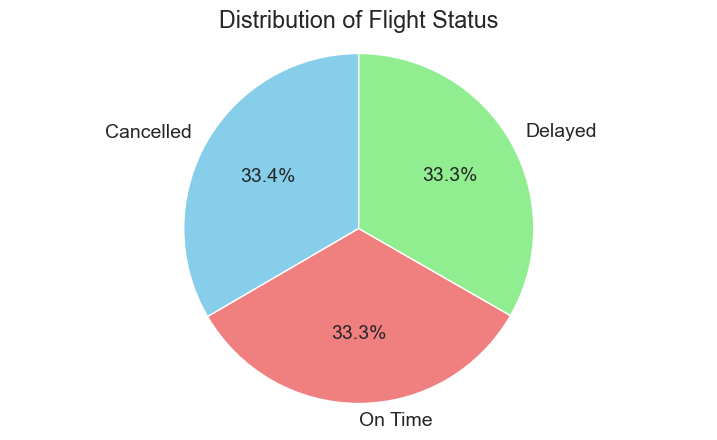

In [11]:
# Plotting the pie chart
pf = flights_ratio.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Adding title
plt.title('Distribution of Flight Status')
pf.set_ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

<Figure size 800x600 with 0 Axes>

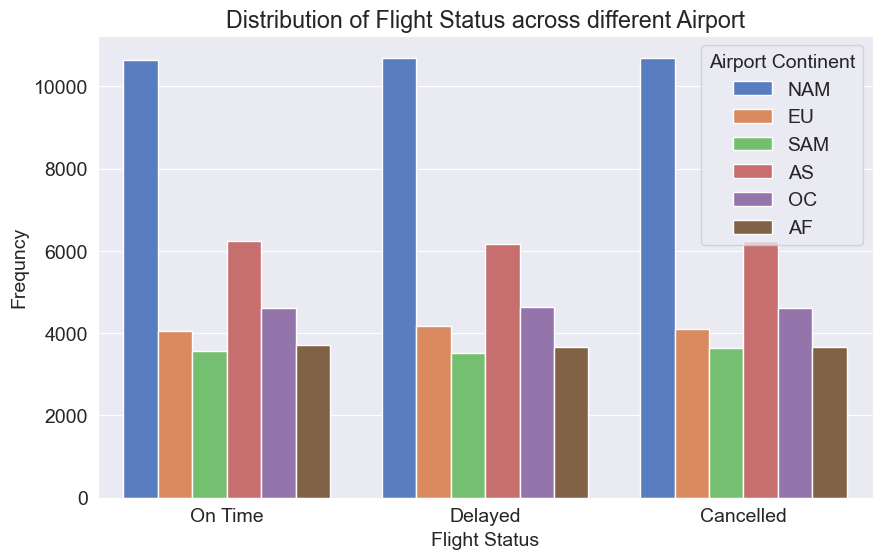

In [12]:
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot with hue
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='Flight Status', hue='Airport Continent', orient='r', palette='muted');

plt.xlabel('Flight Status')
plt.ylabel('Frequncy')
plt.title('Distribution of Flight Status across different Airport')

plt.show();

### Gender ratio


In [13]:
Genders = df['Gender'].value_counts()*100/len(df['Gender'])
Genders

Gender
Male      50.29254
Female    49.70746
Name: count, dtype: float64

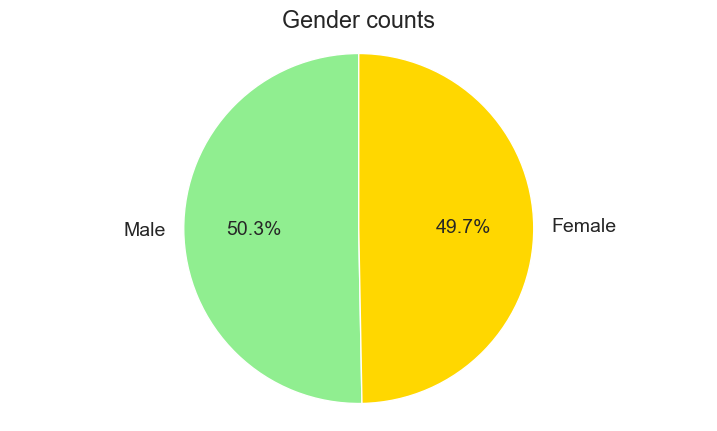

In [14]:
gf = Genders.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=[ 'lightgreen', 'gold'])

# Adding title
plt.title('Gender counts')
gf.set_ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

<Figure size 800x600 with 0 Axes>

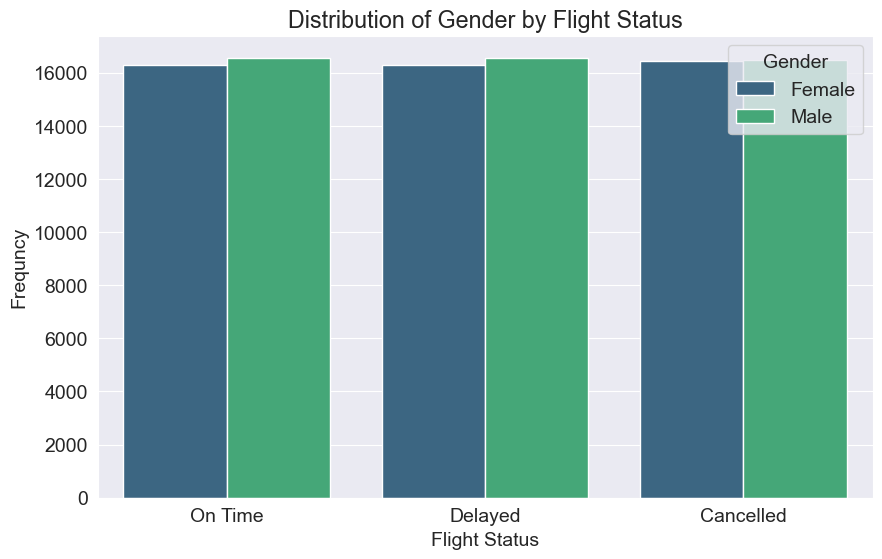

In [15]:
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot with hue
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='Flight Status', hue='Gender', orient='h', palette='viridis');

plt.xlabel('Flight Status')
plt.ylabel('Frequncy')
plt.title('Distribution of Gender by Flight Status')

plt.show();

### Age

In [16]:
# Calculate the average age
avg_age = df['Age'].mean()
avg_age

45.50402052342855

In [17]:
unique_ages = df['Age'].unique()
unique_ages


array([62, 67, 71, 21, 55, 73, 36, 35, 13, 39, 47, 77, 32, 22, 28, 12, 87,
       24, 19, 45, 29,  8, 14, 53,  6, 58, 44,  9, 74, 37, 54, 61, 56, 85,
       50, 83, 17, 76, 51, 16, 23, 41, 52, 33, 89,  3, 30, 26, 78, 43, 80,
       49, 68, 70, 46, 65,  2,  7, 25, 88, 18,  4, 27, 10, 72, 79, 66, 38,
       84, 11, 20, 82, 86, 42,  1, 90, 69, 75, 15, 40, 48, 64, 57, 59, 34,
       81,  5, 63, 31, 60], dtype=int64)

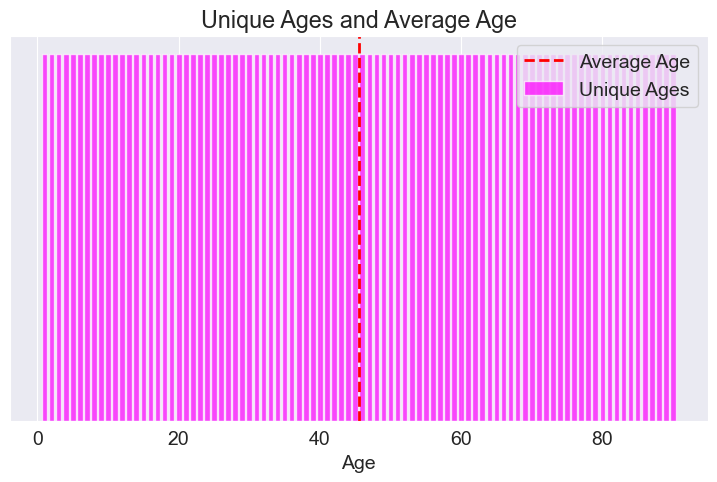

In [18]:
# Plot unique ages without count as points
plt.bar(unique_ages, [1] * len(unique_ages), color='magenta', alpha=0.7, label='Unique Ages')
plt.axvline(avg_age, color='red', linestyle='dashed', linewidth=2, label='Average Age')

plt.xlabel('Age')
plt.yticks([])  # To hide the y-axis ticks
plt.title('Unique Ages and Average Age')
plt.legend()
plt.show()

### Continents 


In [19]:
#continents counts
continents = df['Continents'].value_counts()
continents

Continents
North America    32033
Asia             18637
Oceania          13866
Europe           12335
Africa           11030
South America    10718
Name: count, dtype: int64

In [20]:
#continents ratio
continents = (continents*100/len(df['Continents'])).round(2)
continents

Continents
North America    32.48
Asia             18.90
Oceania          14.06
Europe           12.51
Africa           11.18
South America    10.87
Name: count, dtype: float64

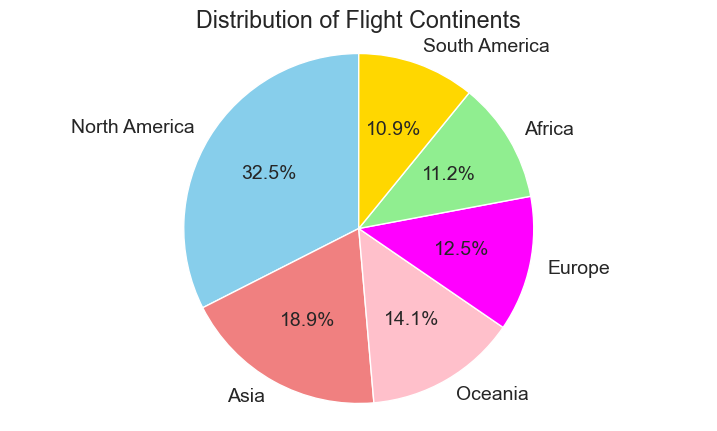

In [21]:
# Plotting the pie chart
cf = continents.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'pink','magenta','lightgreen', 'gold'])

# Adding title
plt.title('Distribution of Flight Continents')
cf.set_ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [22]:
#North America
NM = df[df['Continents'] == 'North America']
status_nm = NM['Flight Status'].value_counts().reset_index()
status_nm

,Flight Status,count
0,Delayed,10696
1,Cancelled,10693
2,On Time,10644


In [23]:
SM = df[df['Continents'] == 'South America']
status_sm = SM['Flight Status'].value_counts().reset_index()
status_sm

,Flight Status,count
0,Cancelled,3643
1,On Time,3566
2,Delayed,3509


In [24]:
ASI = df[df['Continents'] == 'Asia']
status_asi = ASI['Flight Status'].value_counts().reset_index()
status_asi

,Flight Status,count
0,On Time,6242
1,Cancelled,6235
2,Delayed,6160


In [25]:
OC = df[df['Continents'] == 'Oceania']
status_oc = OC['Flight Status'].value_counts().reset_index()
status_oc

,Flight Status,count
0,Delayed,4634
1,Cancelled,4619
2,On Time,4613


In [26]:
af = df[df['Continents'] == 'Africa']
status_af = af['Flight Status'].value_counts().reset_index()
status_af


,Flight Status,count
0,On Time,3719
1,Cancelled,3657
2,Delayed,3654


In [27]:
eu = df[df['Continents'] == 'Europe']
status_eu = eu['Flight Status'].value_counts().reset_index()
status_eu

,Flight Status,count
0,Delayed,4178
1,Cancelled,4095
2,On Time,4062


### Time series analysis of depature date

In [28]:
#group flights by Departure Date and count the number of flights per day
flight_counts = df.groupby('Departure Date').size()

In [29]:
flight_counts.nsmallest(10)

Departure Date
2022-06-18    224
2022-10-04    231
2022-08-28    232
2022-04-30    233
2022-12-12    233
2022-04-19    236
2022-06-01    236
2022-10-26    236
2022-11-26    238
2022-04-29    239
dtype: int64

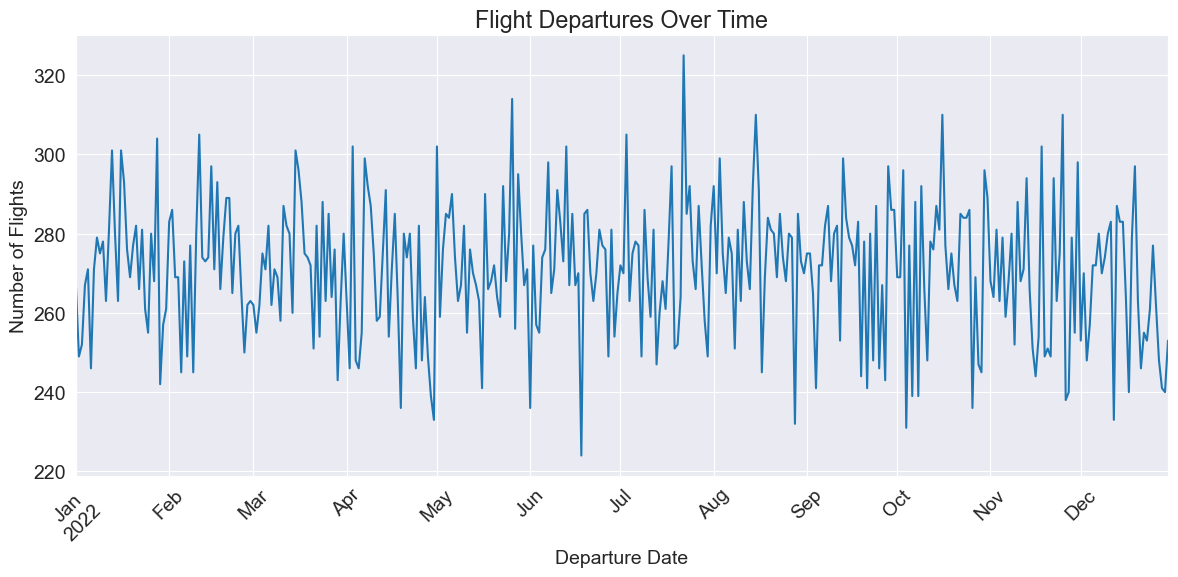

In [30]:
#create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

#plot the flight departures over time
flight_counts.plot(ax=ax)

#set the x-axis label and rotate the tick labels for better visibility
ax.set_xlabel('Departure Date')
plt.xticks(rotation=45)

#set the y-axis label
ax.set_ylabel('Number of Flights')

#add a title to the plot
plt.title('Flight Departures Over Time')
plt.tight_layout()


### Modelling

In [31]:
features = ['Airport Name', 'Country Name', 'Airport Continent', 'Day_of_Week', 'Month']
dfs = df[features].copy()

In [32]:
dfs.shape

(98619, 5)

In [33]:
# Encoding the categorical features
le = LabelEncoder()

for _ in features:
    dfs[_] = le.fit_transform(dfs[_])

In [34]:
dfs.nunique()

Airport Name         9062
Country Name          235
Airport Continent       6
Day_of_Week             7
Month                  12
dtype: int64

In [35]:
dfs.describe()

,Airport Name,Country Name,Airport Continent,Day_of_Week,Month
count,98619.000000,98619.000000,98619.000000,98619.000000,98619.000000
mean,4540.170342,126.244466,2.519393,3.006865,5.497430
std,2609.742281,79.115406,1.493975,2.000503,3.432398
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2279.000000,42.000000,1.000000,1.000000,3.000000
50%,4548.000000,130.000000,3.000000,3.000000,6.000000
75%,6801.000000,220.000000,3.000000,5.000000,8.000000
max,9061.000000,234.000000,5.000000,6.000000,11.000000


In [36]:
# scaling the features 
scaler = StandardScaler()
X = scaler.fit_transform(dfs)

In [37]:
y = df['Flight Status'].copy().apply(lambda x: 1 if x == 'Delayed' else 0) 
y

0        0
1        0
2        0
3        1
4        0
        ..
98614    0
98615    0
98616    0
98617    0
98618    1
Name: Flight Status, Length: 98619, dtype: int64

In [38]:
# Split the data into features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
classifiers = {
    'XGBClassifier' : XGBClassifier(),
    'DecisionTreeCLassifier' : DecisionTreeClassifier()
}


for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'{name}:\nAccuracy = {accuracy:.2f}\n')
    print(report)
    print('=' * 80)

XGBClassifier:
Accuracy = 0.66

              precision    recall  f1-score   support

           0       0.66      0.98      0.79     13069
           1       0.35      0.02      0.03      6655

    accuracy                           0.66     19724
   macro avg       0.51      0.50      0.41     19724
weighted avg       0.56      0.66      0.54     19724

DecisionTreeCLassifier:
Accuracy = 0.55

              precision    recall  f1-score   support

           0       0.66      0.66      0.66     13069
           1       0.34      0.34      0.34      6655

    accuracy                           0.55     19724
   macro avg       0.50      0.50      0.50     19724
weighted avg       0.55      0.55      0.55     19724

